In [1]:
!pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('my_movies.csv')
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# Pre Processing

In [3]:
data1=pd.get_dummies(data)
data1.head() 

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Apriori Algorithm

In [4]:
#Taking support as 10% and confidence as 70%
frequent_items=apriori(data1, min_support=0.1, use_colnames=True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V4_Green Mile, Harry Potter1, V5_LOTR2, V3_Ha..."
1393,0.1,"(V4_Green Mile, LOTR2, V5_LOTR2, V3_Harry Pott..."
1394,0.1,"(V4_Green Mile, LOTR2, Harry Potter1, V5_LOTR2..."
1395,0.1,"(V4_Green Mile, LOTR2, Harry Potter1, V5_LOTR2..."


In [5]:
rules=association_rules(frequent_items, metric='lift', min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
64247,(Sixth Sense),"(V4_Green Mile, LOTR2, Harry Potter1, V5_LOTR2...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
64248,(V2_LOTR1),"(V4_Green Mile, LOTR2, Harry Potter1, V5_LOTR2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64249,(LOTR1),"(V4_Green Mile, LOTR2, Harry Potter1, V5_LOTR2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64250,(Green Mile),"(V4_Green Mile, LOTR2, Harry Potter1, V5_LOTR2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [6]:
#Sort the values
rules.sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
32126,"(LOTR2, V3_Harry Potter1, LOTR1, Sixth Sense)","(Harry Potter1, Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33437,"(LOTR1, V2_LOTR1, V5_LOTR2)","(LOTR2, Harry Potter1, V4_Green Mile, Sixth Se...",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33415,"(V4_Green Mile, V5_LOTR2, Sixth Sense)","(LOTR2, Harry Potter1, LOTR1, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33416,"(LOTR1, V4_Green Mile, V5_LOTR2)","(LOTR2, Harry Potter1, V2_LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33417,"(V4_Green Mile, V2_LOTR1, Sixth Sense)","(LOTR2, Harry Potter1, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33418,"(LOTR1, V4_Green Mile, V2_LOTR1)","(LOTR2, Harry Potter1, V5_LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33419,"(LOTR1, V4_Green Mile, Sixth Sense)","(LOTR2, V2_LOTR1, Harry Potter1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33420,"(LOTR2, Harry Potter1, V5_LOTR2)","(LOTR1, V4_Green Mile, V2_LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33421,"(LOTR2, Harry Potter1, V2_LOTR1)","(LOTR1, V4_Green Mile, V5_LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0
33422,"(LOTR2, Harry Potter1, Sixth Sense)","(LOTR1, V2_LOTR1, V4_Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0


In [7]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
64247,(Sixth Sense),"(V4_Green Mile, LOTR2, Harry Potter1, V5_LOTR2...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
64248,(V2_LOTR1),"(V4_Green Mile, LOTR2, Harry Potter1, V5_LOTR2...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64249,(LOTR1),"(V4_Green Mile, LOTR2, Harry Potter1, V5_LOTR2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64250,(Green Mile),"(V4_Green Mile, LOTR2, Harry Potter1, V5_LOTR2...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


# visualization

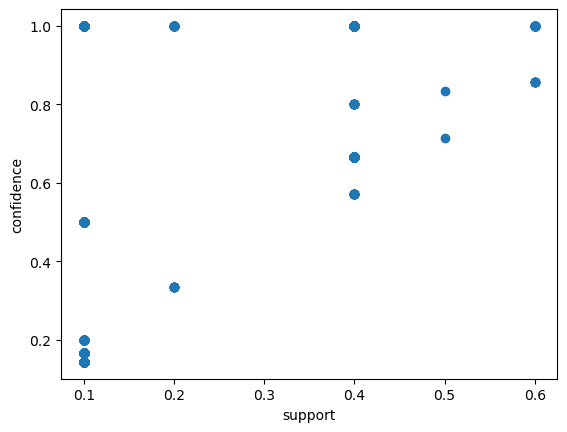

In [8]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'],)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show() 

In [9]:
#2) Taking 20% as support and 80% as confidence
frequent_items1=apriori(data1, min_support=0.2, use_colnames=True)
frequent_items1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Patriot, V2_Patriot, V3_Sixth Sense, Sixth Se..."
77,0.4,"(V2_Patriot, V3_Sixth Sense, Sixth Sense, Glad..."
78,0.4,"(Patriot, V2_Patriot, V3_Sixth Sense, Sixth Se..."
79,0.4,"(Patriot, V2_Patriot, V3_Sixth Sense, Gladiato..."


In [10]:
rules1=association_rules(frequent_items1, metric='lift', min_threshold=0.8)
rules1
rules1.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
327,(V1_Sixth Sense),"(V4_Green Mile, Green Mile, Sixth Sense)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
176,"(V4_Green Mile, Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
40,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
41,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
86,"(Green Mile, Sixth Sense)",(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
...,...,...,...,...,...,...,...,...,...,...
102,(Sixth Sense),"(V2_Patriot, V1_Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
439,(Sixth Sense),"(Patriot, V2_Patriot, Gladiator, V1_Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
45,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25
214,(Sixth Sense),"(Patriot, V2_Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25


In [11]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
...,...,...,...,...,...,...,...,...,...,...
649,(V2_Patriot),"(Patriot, V3_Sixth Sense, Sixth Sense, Gladiat...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
650,(V3_Sixth Sense),"(Patriot, V2_Patriot, Sixth Sense, Gladiator, ...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
651,(Sixth Sense),"(Patriot, V2_Patriot, V3_Sixth Sense, Gladiato...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
652,(Gladiator),"(Patriot, V2_Patriot, V3_Sixth Sense, Sixth Se...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000


# visualization

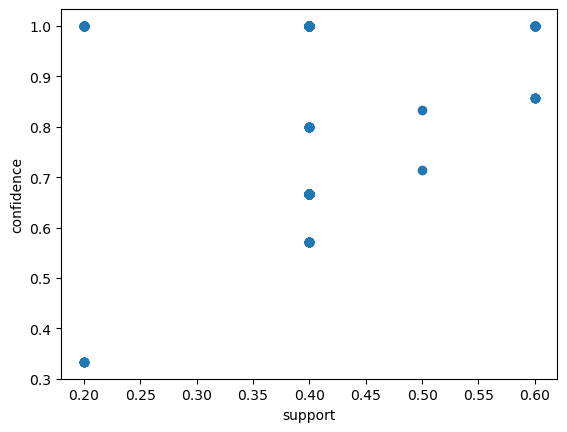

In [12]:
import matplotlib.pyplot as plt
plt.scatter(rules1['support'],rules1['confidence'],)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show() 